In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [7]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [8]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [9]:
data.shape

(12043, 23)

In [10]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [16]:
data= data.drop(['bpay_biller_code','merchant_code'],axis=1)

In [17]:
data.isnull().sum()

status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [20]:
avg_trans= (data['amount'].sum()/data['amount'].count())
avg_trans

187.93358797641784

In [33]:
data['date'] = pd.to_datetime(data['date'])

In [34]:
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Exploratory Data Analysis

In [37]:
data['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [39]:
data['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [42]:
data_date_count= data.groupby('date').count()
data_date_count

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
date,,,,,,,,,,,,,,,,,,,,
2018-08-01,137,84,137,137,137,137,84,137,137,137,137,84,84,137,137,137,137,137,84,137
2018-08-02,152,99,152,152,152,152,99,152,152,152,152,99,99,152,152,152,152,152,99,152
2018-08-03,157,99,157,157,157,157,99,157,157,157,157,99,99,157,157,157,157,157,99,157
2018-08-04,118,94,118,118,118,118,94,118,118,118,118,94,94,118,118,118,118,118,94,118
2018-08-05,100,73,100,100,100,100,73,100,100,100,100,73,73,100,100,100,100,100,73,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-27,139,101,139,139,139,139,101,139,139,139,139,101,101,139,139,139,139,139,101,139
2018-10-28,143,101,143,143,143,143,101,143,143,143,143,101,101,143,143,143,143,143,101,143
2018-10-29,102,63,102,102,102,102,63,102,102,102,102,63,63,102,102,102,102,102,63,102


In [48]:
trans_vol= data_date_count['customer_id'].mean()
n_points = len(data_date_count.index)

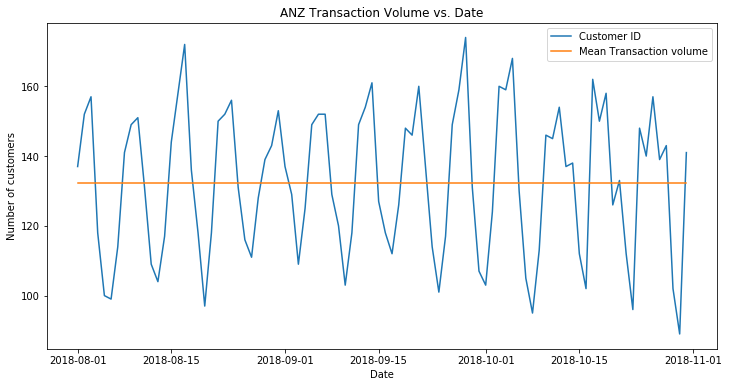

In [56]:
plt.figure(figsize=(12,6))
plt.plot(data_date_count.index, data_date_count['customer_id'], label='Customer ID')
plt.plot(data_date_count.index, np.linspace(trans_vol,trans_vol,n_points), label='Mean Transaction volume')
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.show()

In [57]:
data_date_mean= data.groupby('date').mean()

In [58]:
trans_amt = data_date_mean["amount"].mean()
n_points = len(data_date_count.index)

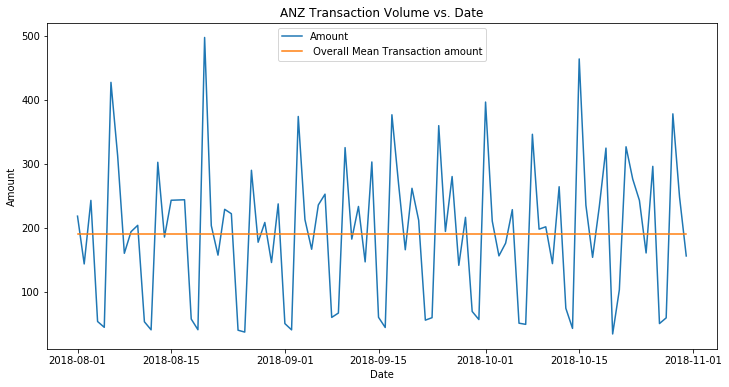

In [60]:
plt.figure(figsize=(12,6))
plt.plot(data_date_count.index, data_date_mean['amount'], label='Amount')
plt.plot(data_date_count.index, np.linspace(trans_amt,trans_amt,n_points), label=' Overall Mean Transaction amount')
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()

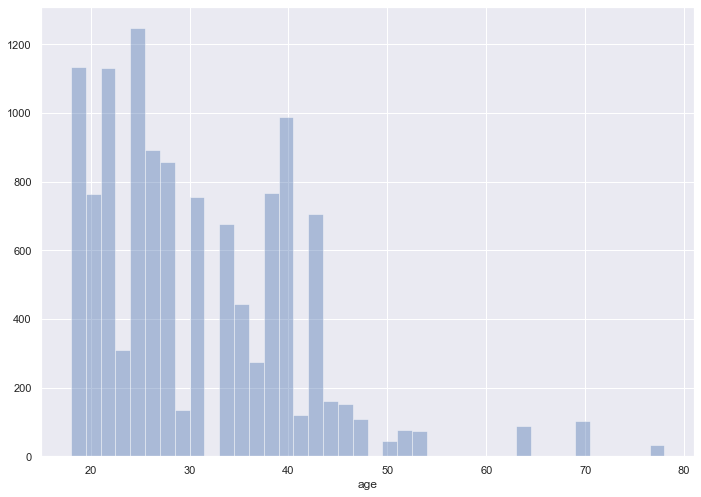

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['age'],kde=False,bins=40)

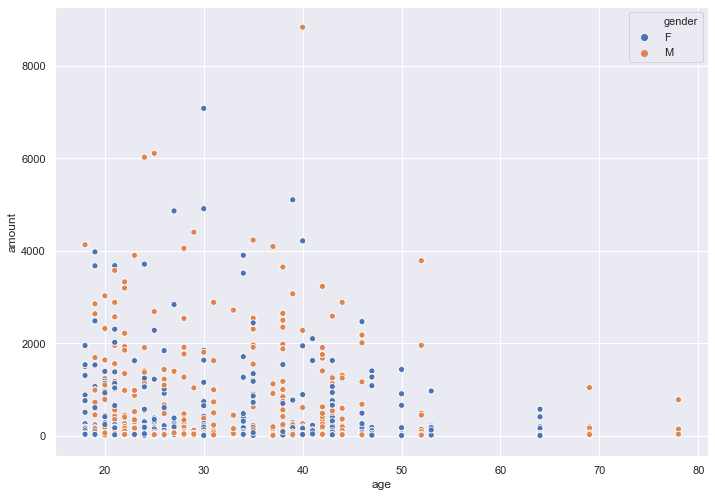

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=data['age'],y=data['amount'],hue='gender',data=data)

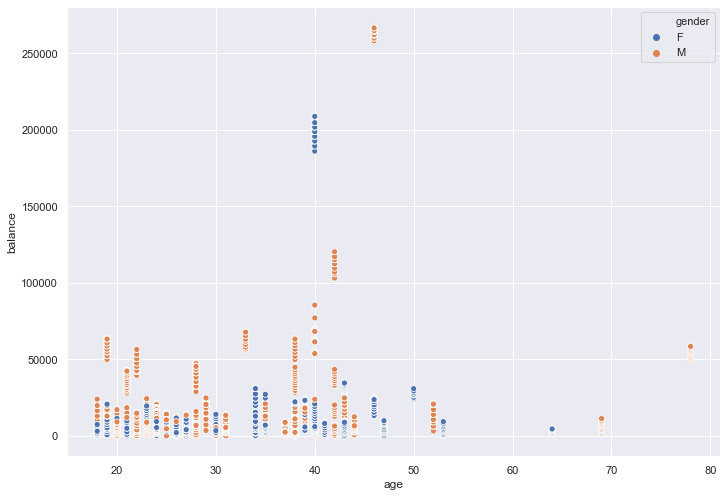

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=data['age'],y=data['balance'],hue='gender',data=data)

In [76]:
pd.crosstab(data['card_present_flag'],data['age'] )

age,18,19,20,21,22,23,24,25,26,27,...,43,44,46,47,50,52,53,64,69,78
card_present_flag,,,,,,,,,,,,,,,,,,,,,
0.0,50,81,102,87,44,29,99,61,141,66,...,56,24,10,8,8,11,9,6,11,0
1.0,210,338,428,384,181,111,459,307,560,250,...,220,64,42,44,23,32,39,53,42,3


In [77]:
data.corr()

,card_present_flag,balance,age,amount
card_present_flag,1.000000,0.005925,-0.008405,-0.002074
balance,0.005925,1.000000,0.199329,0.059178
age,-0.008405,0.199329,1.000000,0.029980
amount,-0.002074,0.059178,0.029980,1.000000


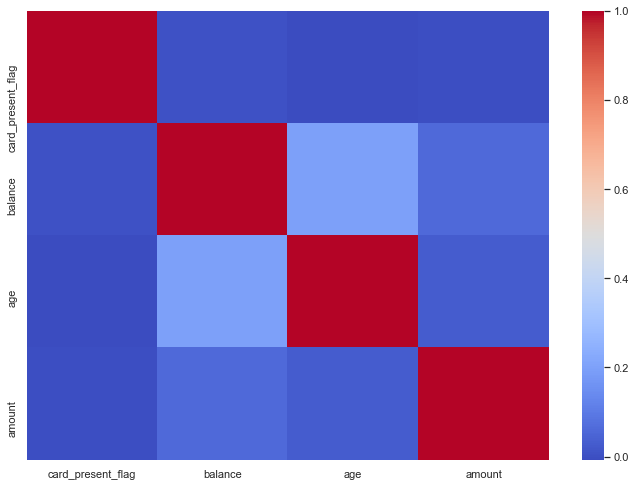

In [79]:
sns.heatmap(data.corr(),cmap='coolwarm')